In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("smartcart_customers.csv")

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

# Data Preprocessing




1. Handle Missing Values

In [8]:
df["Income"]= df["Income"].fillna(df["Income"].median())

## Feature Engineering 

In [12]:
# Age

df["Age"] = 2026- df["Year_Birth"]


In [15]:
# Customer Joinig Date

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst= True)

reference_date = df["Dt_Customer"].max()

df["Customer_Tenure_Days"] = (reference_date - df["Dt_Customer"]).dt.days



In [18]:
# Spending

df["Total_Spending"] = df["MntWines"]+ df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] +df["MntGoldProds"]

In [20]:
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

In [25]:
# Education

df["Education"].value_counts()

df["Education"] = df["Education"].replace({
    "Basic" : "Undergraduate", "2n Cycle" : "Undergraduate" ,
    "Graduation" : "Graduate", 
    "Master" : "Postgraduate", "PhD": "Postgraduate"
})

In [29]:
# Marital Status
df["Marital_Status"].value_counts()

df["Living_With"] = df["Marital_Status"].replace({
    "Married" : "Partner", "Together" : "Partner" ,
    "Single" : "Alone", "Divorced" : "Alone", 
    "Widow" : "Alone", "Absurd": "Alone" , "YOLO" : "Alone"
})

In [30]:
df["Living_With"].value_counts()

Living_With
Partner    1444
Alone       796
Name: count, dtype: int64

# Drop Columns

In [32]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Tenure_Days', 'Total_Spending',
       'Total_Children', 'Living_With'],
      dtype='object')

In [33]:
cols = ["ID", "Year_Birth", "Marital_Status", "Teenhome", "Dt_Customer", "Kidhome"]
spending_cols = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

cols_to_drop = cols + spending_cols

df_cleaned = df.drop(columns = cols_to_drop)

In [36]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


# Outliers

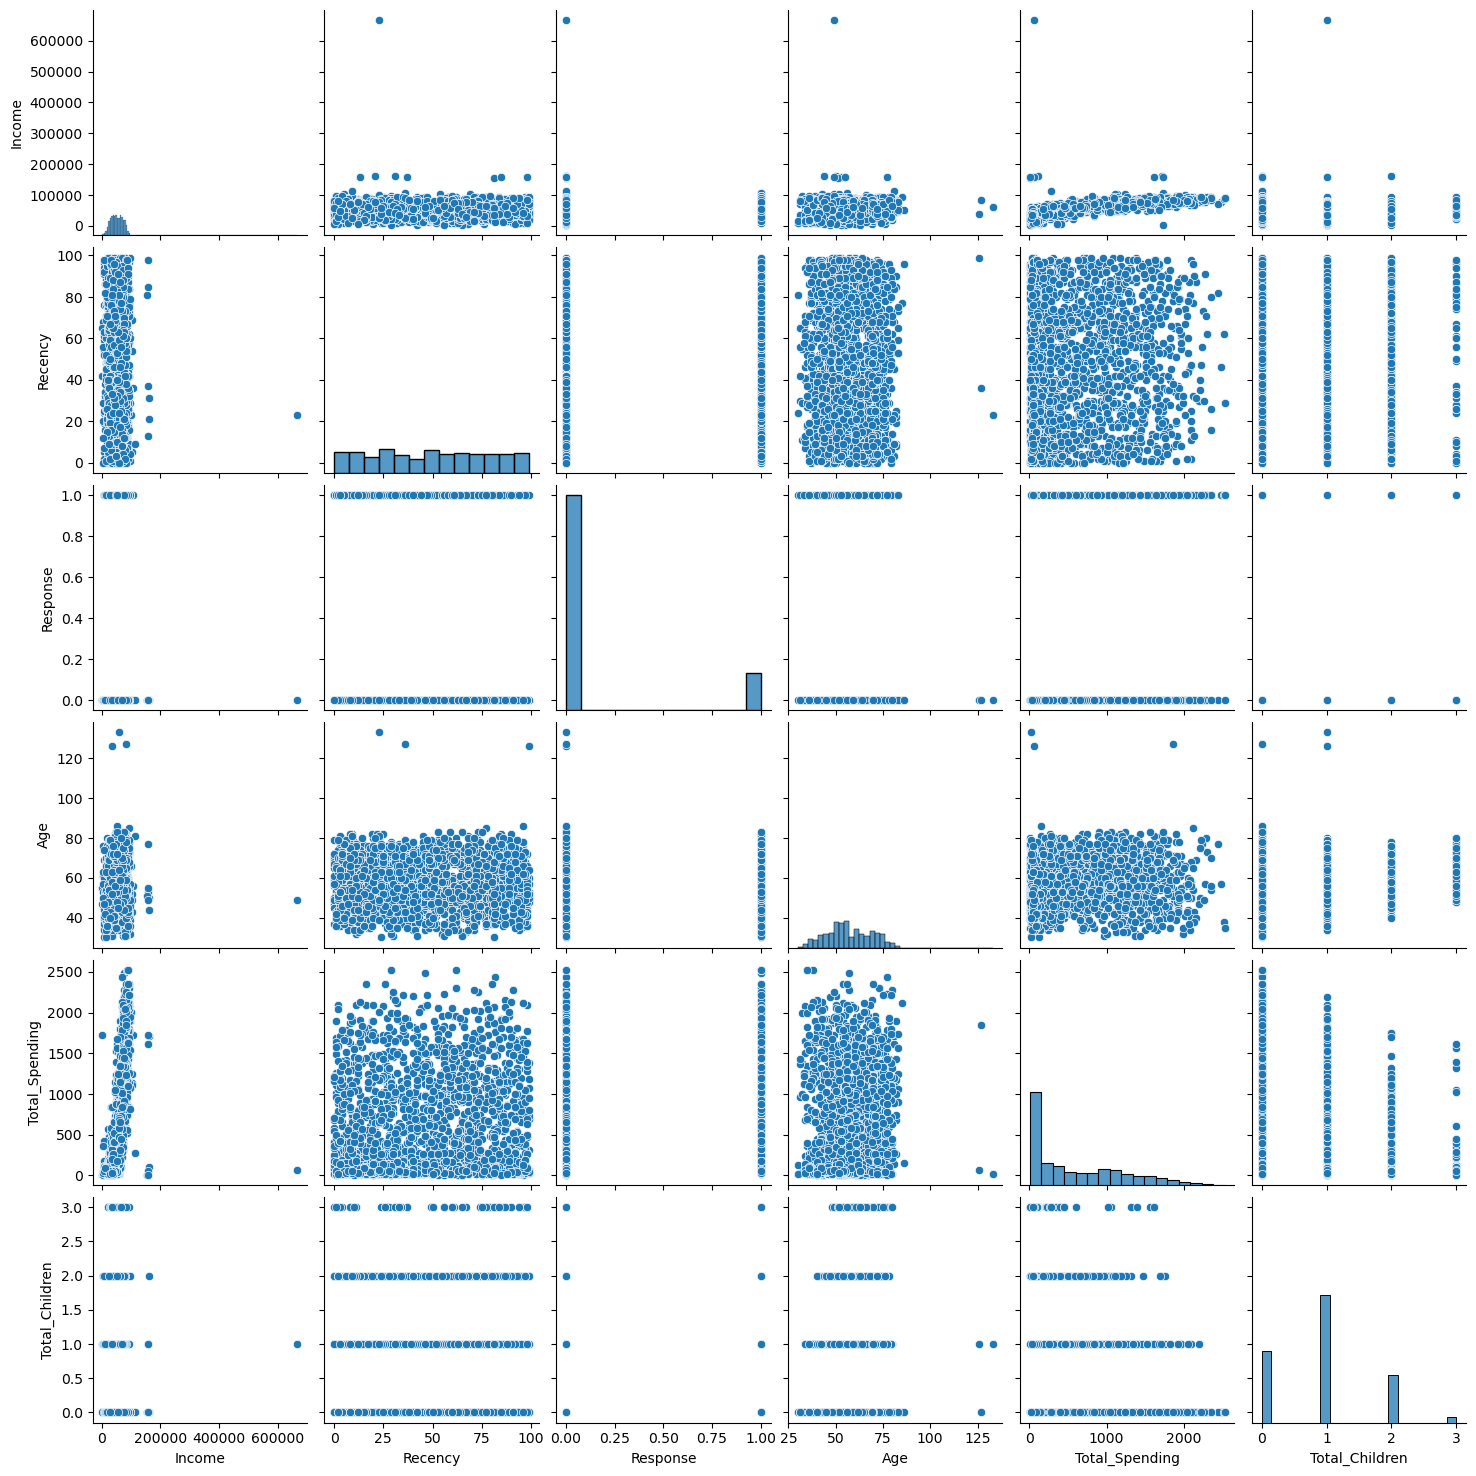

In [37]:
cols = ["Income", "Recency", "Response", "Age", "Total_Spending", "Total_Children"]

# Relatives plots of some features- Pair plots

sns.pairplot(df_cleaned[cols])

In [38]:
# Remove the outliers

print("data size with outliers", len(df_cleaned))

df_cleaned = df_cleaned[ (df_cleaned["Age"] < 90) ]

df_cleaned = df_cleaned[ (df_cleaned["Income"] < 600_000)]

print("Data size without outliers ", len(df_cleaned))


data size with outliers 2240
Data size without outliers  2236


# Heatmap

In [39]:
corr = df_cleaned.corr(numeric_only = True)

<Axes: >

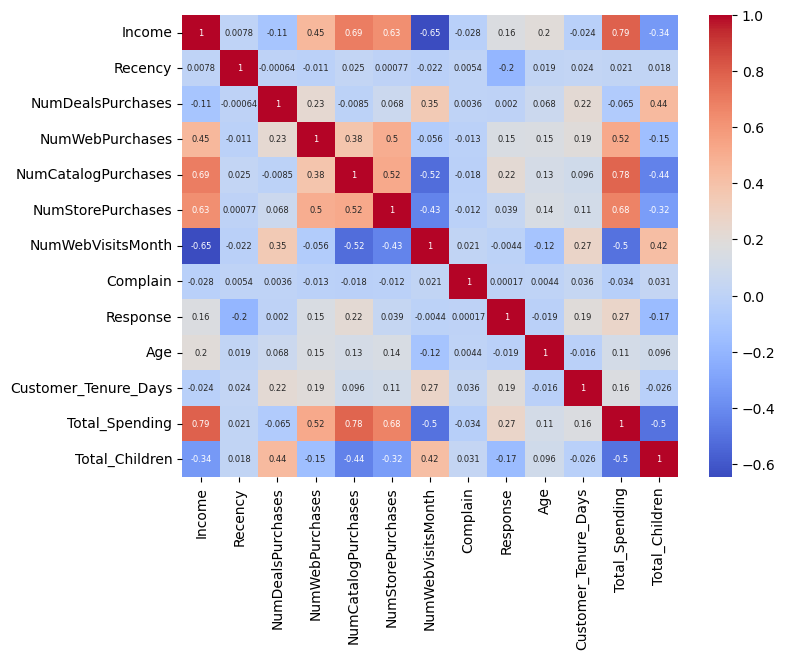

In [43]:
plt.figure(figsize = (8,6))


sns.heatmap(
    corr,
    annot = True,
    annot_kws = {"size": 6},
    cmap = "coolwarm",
    
)

# Encoding

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
ohe = OneHotEncoder()

cat_col = ["Education", "Living_With"]

enc_cols = ohe.fit_transform(df_cleaned[cat_col])

In [52]:
enc_df = pd.DataFrame(enc_cols.toarray(), columns= ohe.get_feature_names_out(cat_col), index= df_cleaned.index)

In [57]:
df_encoded = pd.concat([df_cleaned.drop(columns=cat_col), enc_df], axis=1)

In [58]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0


# Scaling

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
X = df_encoded

In [61]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Visualize



In [63]:
# 2D

from sklearn.decomposition import PCA


In [70]:
pca = PCA(n_components = 3)
x_pca = pca.fit_transform(X_scaled)

Text(0.5, 0.92, '3d projection')

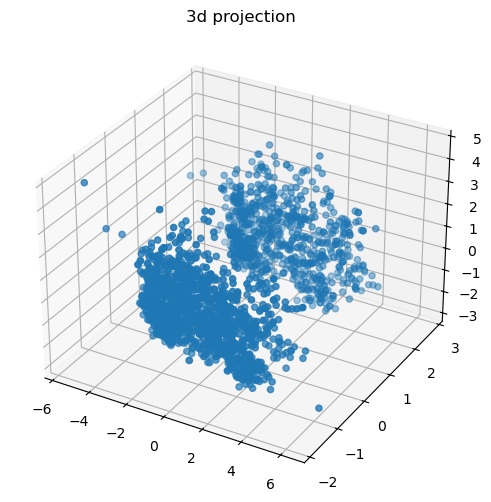

In [74]:
# plot
fig = plt.figure(figsize= (8,6))

ax = fig.add_subplot(111, projection= "3d")

ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2]) 

ax.set_title("3d projection")

# Analyze K values

## 1. Elbow Method

In [84]:
!pip install kneed


In [87]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(x_pca)
    wcss.append(kmeans.inertia_)


In [89]:
knee = KneeLocator(range(1,11), wcss, curve = "convex" , direction= "decreasing")
optional_k = knee.elbow

In [90]:
print("best k =", optional_k)

best k = 4


Text(0, 0.5, 'WCSS')

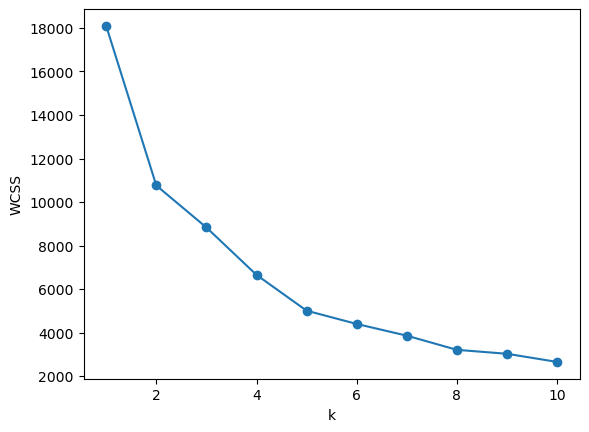

In [91]:
# plot

plt.plot(range(1,11), wcss, marker= 'o')
plt.xlabel("k")
plt.ylabel("WCSS")

## . Silhouette Score

Text(0, 0.5, 'silhouett Score')

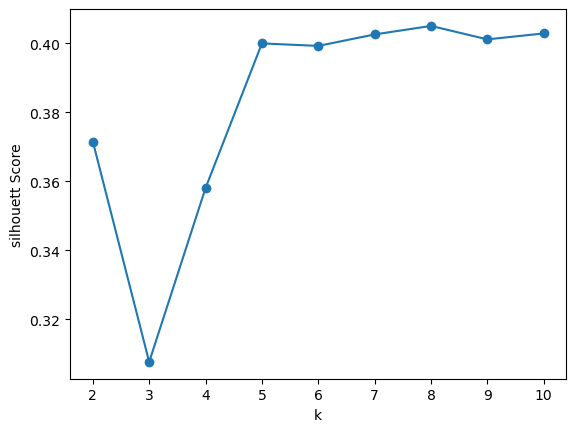

In [100]:
from sklearn.metrics import silhouette_score

scores =[]

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(x_pca)
    score = silhouette_score(x_pca, labels)
    scores.append(score)

#plot

plt.plot(range(2,11), scores, marker= 'o')
plt.xlabel("k")
plt.ylabel("silhouett Score")

Text(0, 0.5, 'SS')

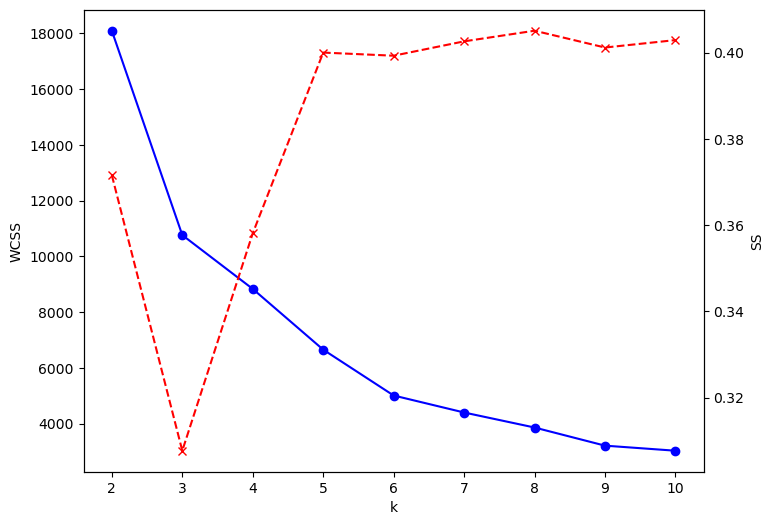

In [107]:
# Cmbined plot
k_range = range(2,11)

fig, ax1 = plt.subplots(figsize = (8,6))

ax1.plot(k_range, wcss[:len(k_range)], marker = "o", color= "blue")
ax1.set_xlabel("k")
ax1.set_ylabel("WCSS")

ax2 = ax1.twinx()
ax2.plot(k_range, scores[:len(k_range)], marker="x", color= "red", linestyle="--")
ax2.set_ylabel("SS")

# Clustering

In [108]:
# K_MEANS

kmeans = KMeans(n_clusters= 4, random_state= 42)
labels_kmeans = kmeans.fit_predict(x_pca)

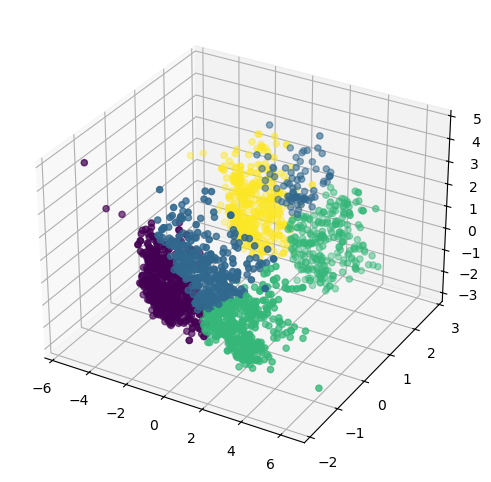

In [109]:
# plot
fig = plt.figure(figsize= (8,6))

ax = fig.add_subplot(111, projection= "3d")

ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c= labels_kmeans) 

In [112]:
# Aglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

In [114]:
agg_clf = AgglomerativeClustering(n_clusters = 4, linkage= "ward")
labels_agg = agg_clf.fit_predict(x_pca)

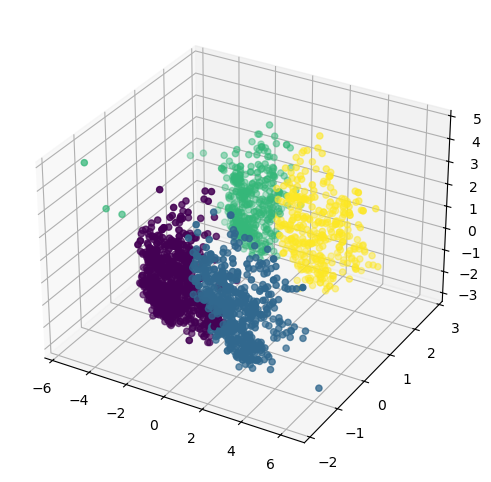

In [115]:
# plot
fig = plt.figure(figsize= (8,6))

ax = fig.add_subplot(111, projection= "3d")

ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c= labels_agg) 

# Charecterization of Clusters

In [147]:
X["cluster"] = labels_agg

<Axes: xlabel='Cluster', ylabel='count'>

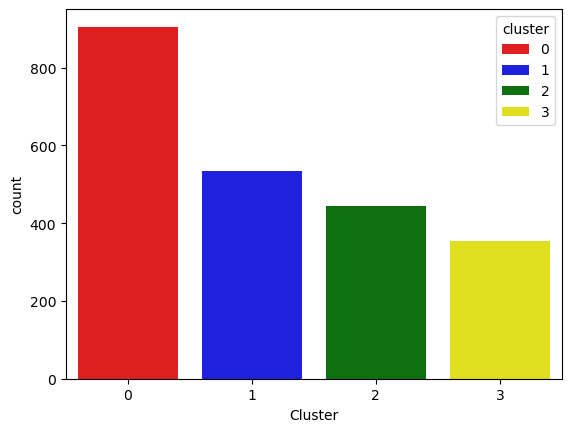

In [149]:
pal = ["red", "blue", "green", "yellow"]

sns.countplot(x=df_cleaned["Cluster"], palette= pal, hue= X["cluster"])

<Axes: xlabel='Total_Spending', ylabel='Income'>

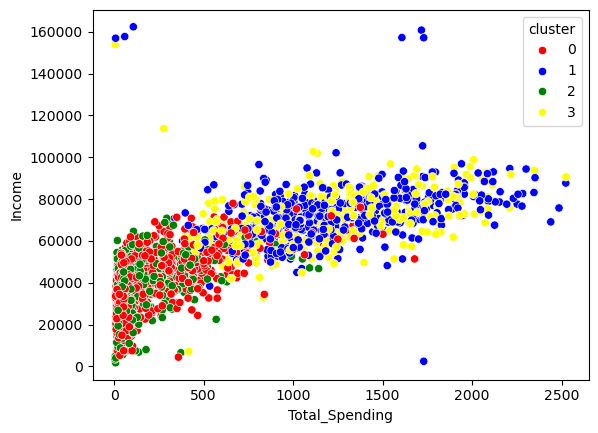

In [153]:
# Income and spending pattern

sns.scatterplot(x= X["Total_Spending"], y= X["Income"], hue= X["cluster"], palette= pal)

In [152]:
# Clustering Summery

cluster_summery = X.groupby("cluster").mean()
print(X)

       Income  Recency  NumDealsPurchases  NumWebPurchases  \
0     58138.0       58                  3                8   
1     46344.0       38                  2                1   
2     71613.0       26                  1                8   
3     26646.0       26                  2                2   
4     58293.0       94                  5                5   
...       ...      ...                ...              ...   
2235  61223.0       46                  2                9   
2236  64014.0       56                  7                8   
2237  56981.0       91                  1                2   
2238  69245.0        8                  2                6   
2239  52869.0       40                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0                      10                  4                  7         0   
1                       1                  2                  5         0   
2                       